## Solutions for Q3

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [7]:
# Load dataset
df = pd.read_csv("Q3_dataset.csv")

## Part A: Dataset Visualization and Relationship Analysis

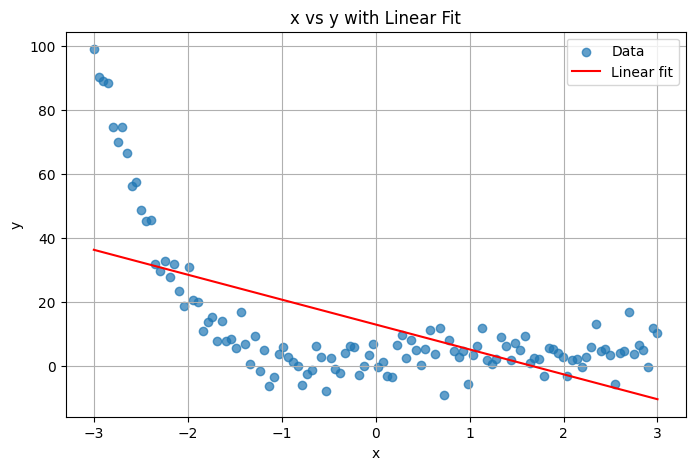

In [5]:
# A scatter plot of x vs y

# Fit linear model
coef = np.polyfit(df["x"], df["y"], 1)
line = np.poly1d(coef)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(df["x"], df["y"], alpha=0.7, label="Data")
plt.plot(df["x"], line(df["x"]), color="red", label="Linear fit")
plt.xlabel("x")
plt.ylabel("y")
plt.title("x vs y with Linear Fit")
plt.legend()
plt.grid(True)
plt.show()

## Part B: Model Implementation

### Simple Linear Regression

In [8]:
X = df[["x"]].values   # shape (n_samples, 1)
y = df["y"].values

In [9]:
# Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Predictions
y_pred_lin = lin_reg.predict(X)

## Polynomial Regression with degrees = {2, 3, 4}

In [10]:
degrees = [2, 3, 4]
poly_models = {}
poly_preds = {}

for d in degrees:
    model = Pipeline([
        ("poly", PolynomialFeatures(degree=d, include_bias=False)),
        ("linreg", LinearRegression())
    ])
    model.fit(X, y)
    poly_models[d] = model
    poly_preds[d] = model.predict(X)


## Model Visualization: Analysis

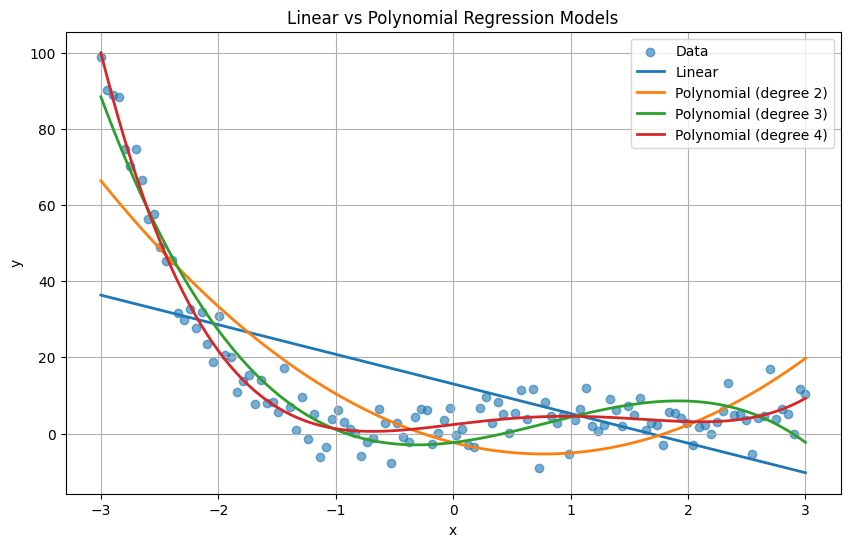

In [11]:
# Sort X for smooth curves
sorted_idx = np.argsort(X[:, 0])
X_sorted = X[sorted_idx]

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, label="Data")

# Linear fit
plt.plot(X_sorted, y_pred_lin[sorted_idx], label="Linear", linewidth=2)

# Polynomial fits
for d in degrees:
    plt.plot(
        X_sorted,
        poly_preds[d][sorted_idx],
        label=f"Polynomial (degree {d})",
        linewidth=2
    )

plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear vs Polynomial Regression Models")
plt.legend()
plt.grid(True)
plt.show()


## Part C: Train–Test Split and Model Evaluation

### Split the data (70% training, 30% testing)

In [13]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

### Training all the models on the training set

In [14]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Polynomial Regression models
degrees = [2, 3, 4]
poly_models = {}

for d in degrees:
    model = Pipeline([
        ("poly", PolynomialFeatures(degree=d, include_bias=False)),
        ("linreg", LinearRegression())
    ])
    model.fit(X_train, y_train)
    poly_models[d] = model

### Evaluate performance using MSE and RMSE

In [16]:
# results
results = []

# Linear Regression evaluation
y_pred_lin = lin_reg.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)

results.append(("Linear", mse_lin, rmse_lin))

# Polynomial models evaluation
for d, model in poly_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    results.append((f"Polynomial (degree {d})", mse, rmse))

# Display results
for model, mse, rmse in results:
    print(f"{model}: MSE = {mse:.3f}, RMSE = {rmse:.3f}")

Linear: MSE = 283.782, RMSE = 16.846
Polynomial (degree 2): MSE = 117.024, RMSE = 10.818
Polynomial (degree 3): MSE = 35.311, RMSE = 5.942
Polynomial (degree 4): MSE = 19.358, RMSE = 4.400


## Train vs Test Error vs Polynomial Plot (MSE)

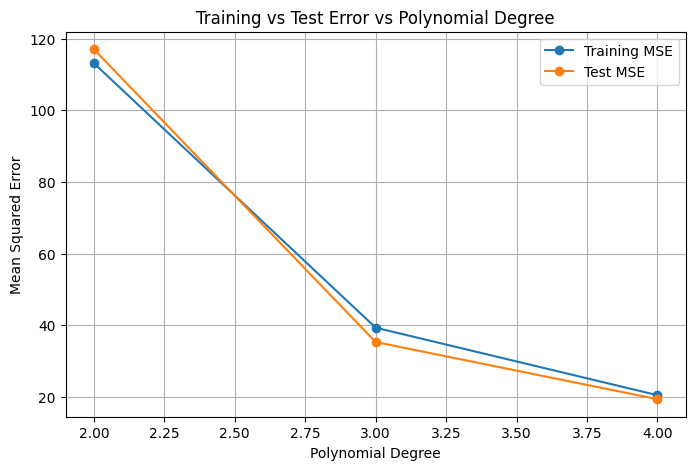

In [21]:
degrees = [2, 3, 4]
train_errors = []
test_errors = []

for d in degrees:
    model = Pipeline([
        ("poly", PolynomialFeatures(degree=d, include_bias=False)),
        ("linreg", LinearRegression())
    ])

    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Errors
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# Plot
plt.figure(figsize=(8, 5))
plt.plot(degrees, train_errors, marker="o", label="Training MSE")
plt.plot(degrees, test_errors, marker="o", label="Test MSE")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Training vs Test MSE vs Polynomial Degree")
plt.legend()
plt.grid(True)
plt.show()


## ## Train vs Test Error vs Polynomial Plot (RMSE)

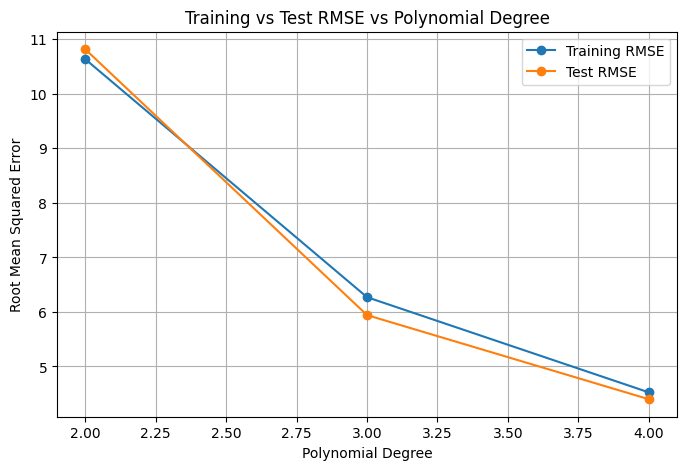

In [28]:
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

degrees = [2, 3, 4]
train_rmse = []
test_rmse = []

for d in degrees:
    model = Pipeline([
        ("poly", PolynomialFeatures(degree=d, include_bias=False)),
        ("linreg", LinearRegression())
    ])

    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # RMSE
    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

# Plot
plt.figure(figsize=(8, 5))
plt.plot(degrees, train_rmse, marker="o", label="Training RMSE")
plt.plot(degrees, test_rmse, marker="o", label="Test RMSE")
plt.xlabel("Polynomial Degree")
plt.ylabel("Root Mean Squared Error")
plt.title("Training vs Test RMSE vs Polynomial Degree")
plt.legend()
plt.grid(True)
plt.show()


## Plot: Linear Regression Predictions

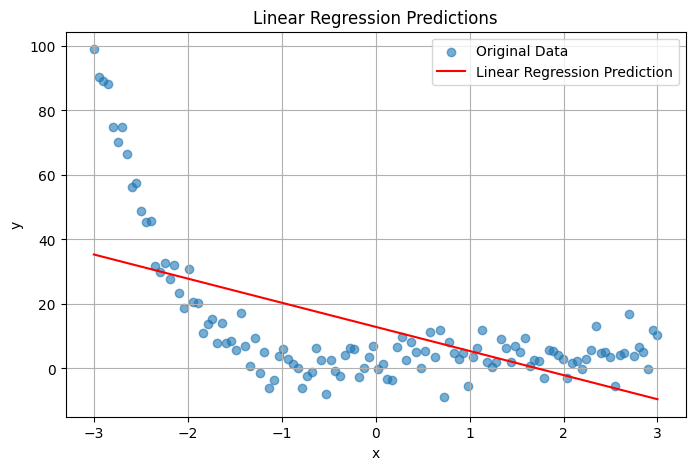

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Train linear regression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Create smooth x values for prediction
x_plot = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_pred = lin_model.predict(x_plot)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X, y, alpha=0.6, label="Original Data")
plt.plot(x_plot, y_pred, color="red", label="Linear Regression Prediction")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression Predictions")
plt.legend()
plt.grid(True)
plt.show()


## Plot: Best Polynomial Model Predictions (Degree 3)

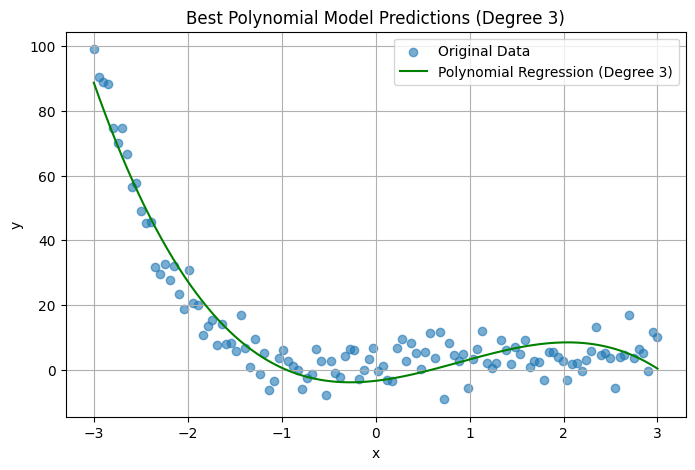

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Train best polynomial model
best_poly_model = Pipeline([
    ("poly", PolynomialFeatures(degree=3, include_bias=False)),
    ("linreg", LinearRegression())
])
best_poly_model.fit(X_train, y_train)

# Create smooth x values for prediction
x_plot = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_poly_pred = best_poly_model.predict(x_plot)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X, y, alpha=0.6, label="Original Data")
plt.plot(x_plot, y_poly_pred, color="green", label="Polynomial Regression (Degree 3)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Best Polynomial Model Predictions (Degree 3)")
plt.legend()
plt.grid(True)
plt.show()


## Plot: Overlay Predictions on the Original Data

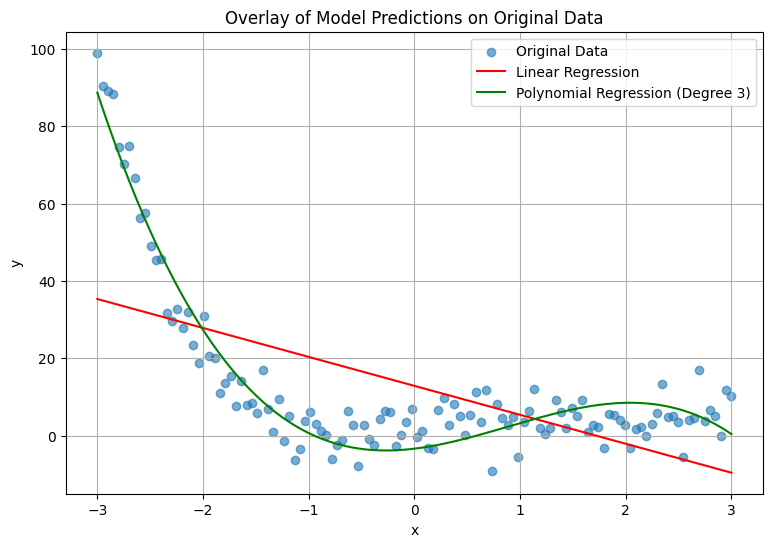

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# Train Linear Regression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Train Best Polynomial Model (degree 3)
poly_model = Pipeline([
    ("poly", PolynomialFeatures(degree=3, include_bias=False)),
    ("linreg", LinearRegression())
])
poly_model.fit(X_train, y_train)

# Smooth x values for plotting predictions
x_plot = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)

# Predictions
y_lin_pred = lin_model.predict(x_plot)
y_poly_pred = poly_model.predict(x_plot)

# Plot
plt.figure(figsize=(9, 6))
plt.scatter(X, y, alpha=0.6, label="Original Data")
plt.plot(x_plot, y_lin_pred, color="red", label="Linear Regression")
plt.plot(x_plot, y_poly_pred, color="green", label="Polynomial Regression (Degree 3)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Overlay of Model Predictions on Original Data")
plt.legend()
plt.grid(True)
plt.show()
